# 경사하강법 
로스를 최소로 하는 경사하강법

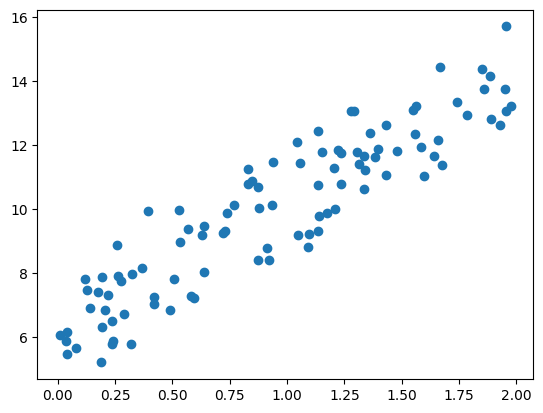

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

np.random.seed(0)

# y = 4x+6 을 근사 (w1 = 4, w0 = 6) + 임의의 값은 노이즈를 만들기 위해 사용

X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

plt.scatter(X,y);

In [15]:
def rmse(y, y_pred):
    N = len(y)
    c = np.sqrt(np.sum(np.square(y-y_pred))/N)
    return c 
def get_weight_updates(w1,w0,X,y,learning_rate= 0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1,w0의 shape와 동일한 크기를 가진 0의 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    # w0_update를 dot 행렬연산으로 구하기 위해 모두 1값을 가진 행렬생성
    w0_factors = np.ones((N,1))
    # w1과 w0를 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))
    return w1_update, w0_update    

# 입력인자 iter로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X,y, iters = 10000):
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
# 인자로 주어진 iter 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate= 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0


w1 : 4.022 w0 : 6.162


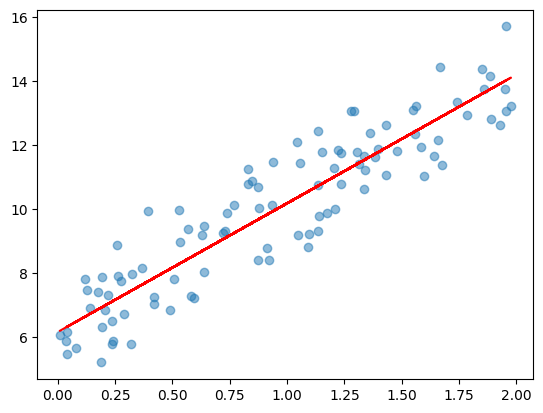

In [28]:
w1, w0 = gradient_descent_steps(X, y, iters = 1000)
print(f'w1 : {w1[0,0]:.3f} w0 : {w0[0,0]:.3f}')

y_pred = w1[0,0] * X + w0[0,0]
plt.scatter(X,y ,alpha=0.5);
plt.plot(X,y_pred,c = 'r');


사이킷런 활용 LinearRegression, 보스턴집값예측

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
%matplotlib inline

boston =load_boston()

In [17]:
import pandas as pd
df = pd.DataFrame(boston.data, columns= boston.feature_names)
df['price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


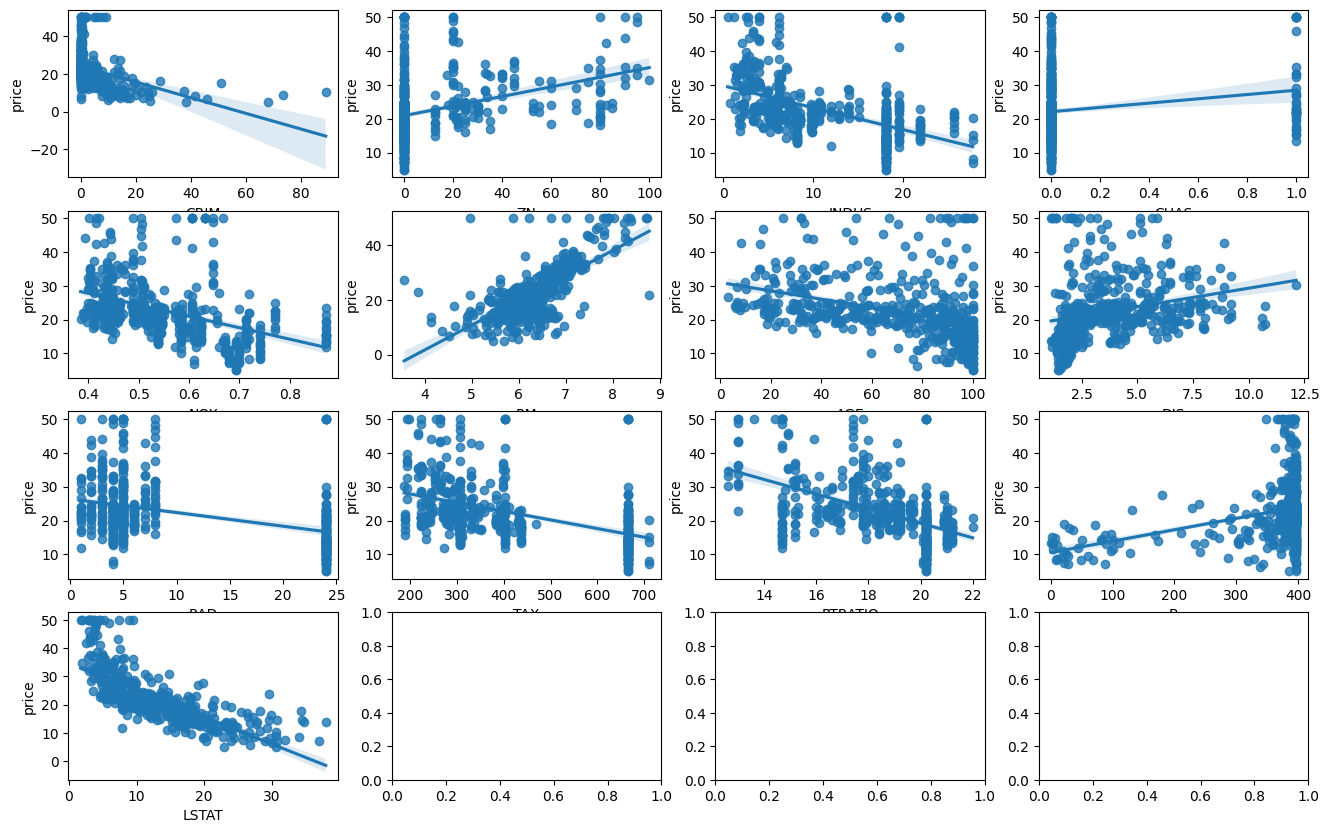

In [33]:
import seaborn as sns

fig, axes = plt.subplots(4, 4,figsize= (16,10))
for idx, col in enumerate(df.iloc[:,:-1].columns):
    sns.regplot(data = df, x= col, y= 'price', ax = axes[idx//4,idx%4]);



In [40]:
X = df.iloc[:,:-1]
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

from sklearn.pipeline import Pipeline

data_pre = Pipeline([
    ('simpleimpute',SimpleImputer()),
    ('stdscaler',StandardScaler())
])

X_train_scaled = data_pre.fit_transform(X_train.values)
X_test_scaled = data_pre.transform(X_test.values)


In [42]:
reg = LinearRegression()
reg.fit(X_train_scaled,y_train)
reg.score(X_test_scaled,y_test)

0.5892223849182512

In [43]:
reg.score(X_train_scaled,y_train)

0.7730135569264233

In [60]:
df.corr()['price'].sort_values()[:]


LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
price      1.000000
Name: price, dtype: float64

In [70]:
cols = ['LSTAT', 'PTRATIO', 'RM']
X1 = df.loc[:,cols]

data_pre = Pipeline([
    ('simpleimpute',SimpleImputer()),
    ('stdscaler',StandardScaler())
])

X1_train, X1_test, y_train, y_test = train_test_split(X1,y, test_size=0.2, random_state=0)
X1_train_scaled = data_pre.fit_transform(X1_train.values)
X1_test_scaled = data_pre.transform(X1_test.values)

In [74]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)


0.5892223849182529

In [88]:
pd.Series(reg.coef_, index=df.columns[:-1], name='coef').sort_values()

NOX       -16.123604
DIS        -1.386397
PTRATIO    -1.045921
LSTAT      -0.492793
CRIM       -0.119443
TAX        -0.010990
AGE        -0.003121
INDUS       0.005485
B           0.008110
ZN          0.044780
RAD         0.244178
CHAS        2.340804
RM          3.708709
Name: coef, dtype: float64

cross_val_score로 검증

In [96]:
from sklearn.model_selection import cross_val_score
import numpy as np

mse= cross_val_score(reg, X_test, y_test,scoring= 'neg_mean_squared_error', cv=5)
rmse = np.sqrt(-1*mse)
rmse, np.mean(rmse)


(array([6.4828514 , 8.4290033 , 6.12670636, 4.60407813, 6.31276965]),
 6.391081768422651)

# 다항회귀 
polynominal features로 다항회기로 qusghksrksmd

In [98]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X= np.arange(4).reshape(2,2)

poly = PolynomialFeatures(degree = 2)
poly_ftr = poly.fit_transform(X)
X , poly_ftr

(array([[0, 1],
        [2, 3]]),
 array([[1., 0., 1., 0., 0., 1.],
        [1., 2., 3., 4., 6., 9.]]))